# YouTube Channel Performance Analytics

In [304]:
import pandas as pd

# # Load the dataset
df = pd.read_csv("youtube_channel_real_performance_analytics.csv")

pd.options.display.float_format = '{:.2f}'.format


# print(df.to_string())


In [305]:
# print(df.isna().sum())
# print("\nDuplicates: ", df.duplicated().sum(), "\n")
# print(df.isnull().sum())
# df.info


In [306]:
# print(df.describe(include='all'))

In [307]:
# # Adjust the display settings to show all columns
# pd.set_option('display.max_columns', None)

# # Print data types of all columns
# print(df.dtypes)


In [308]:
# print(df.columns.tolist())


# Bar Chart: Total revenue per year

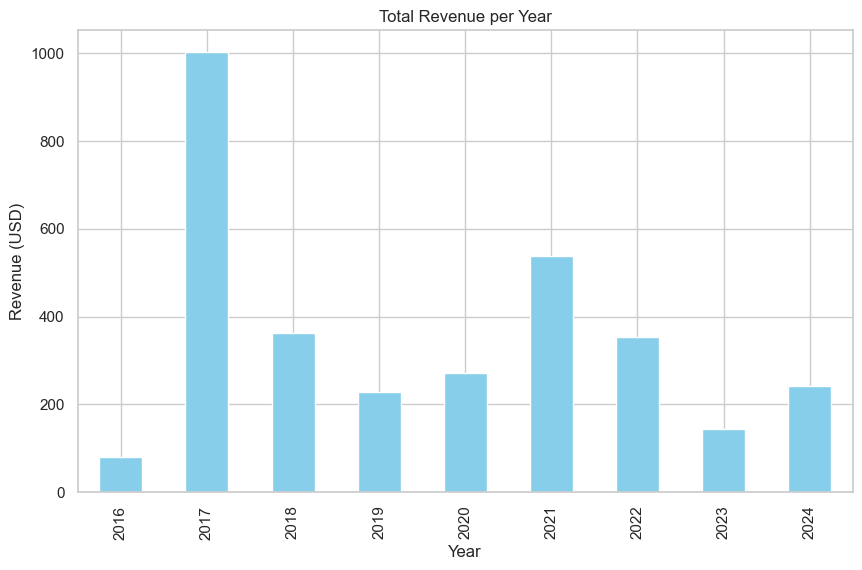

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and sum revenue
revenue_per_year = df.groupby('Year')['Estimated Revenue (USD)'].sum()

# Plot
revenue_per_year.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Revenue per Year')
plt.ylabel('Revenue (USD)')
plt.xlabel('Year')
plt.show()


# Scatter Plot: Subscribers vs Estimated Revenue (USD)

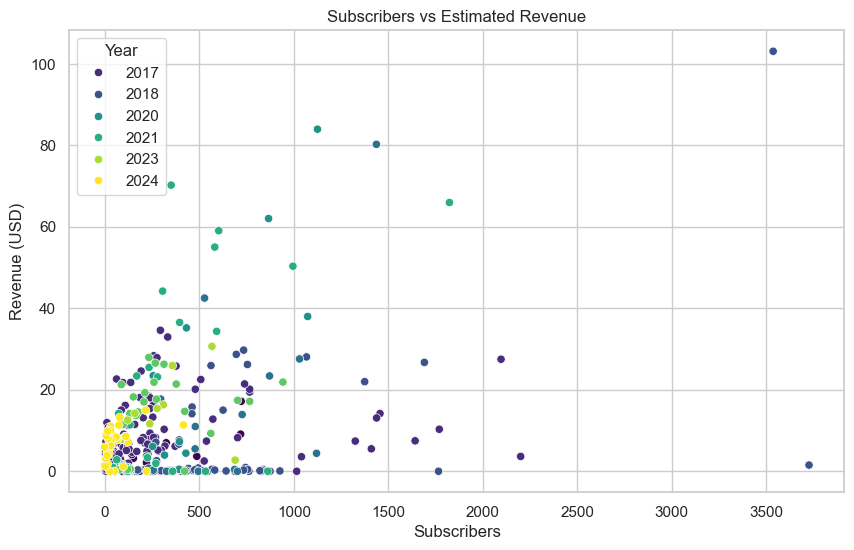

In [310]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Subscribers', y='Estimated Revenue (USD)', hue='Year', palette='viridis')
plt.title('Subscribers vs Estimated Revenue')
plt.xlabel('Subscribers')
plt.ylabel('Revenue (USD)')
plt.show()


# Line Plot: Views Over Time

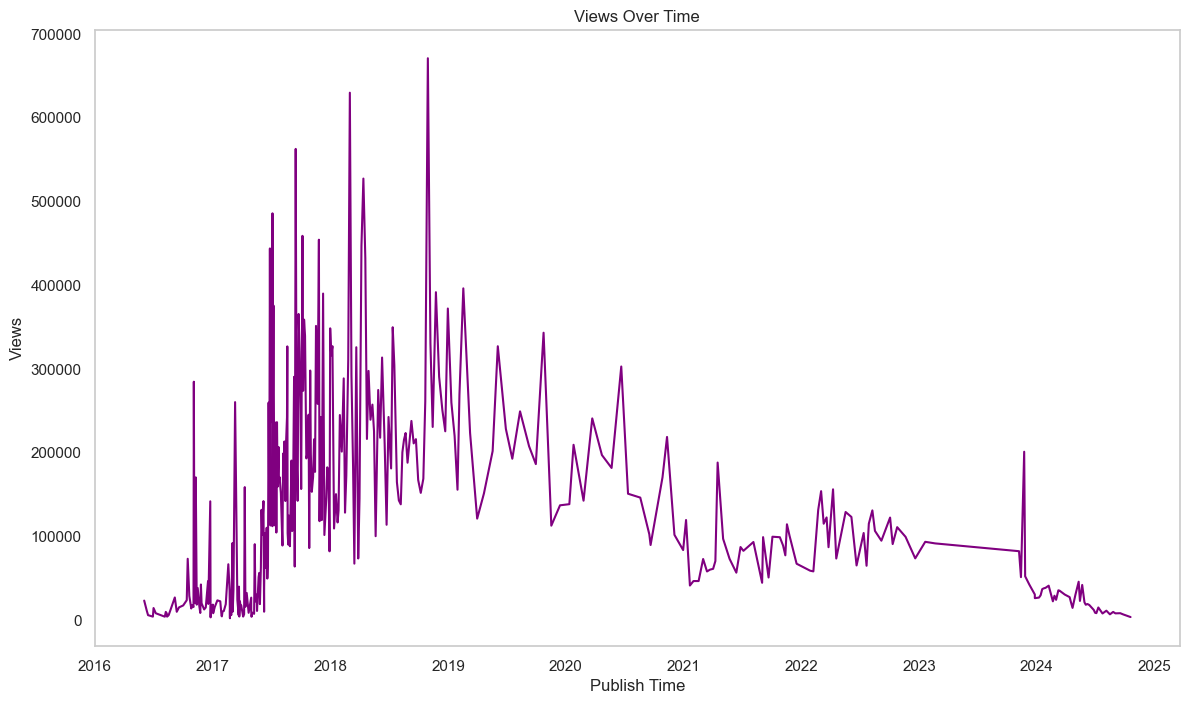

In [311]:
# Ensure Video Publish Time is datetime
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

# Sort by publish time
df = df.sort_values('Video Publish Time')

# Plot
plt.figure(figsize=(14, 8))
plt.plot(df['Video Publish Time'], df['Views'], label='Views', color='purple')
plt.title('Views Over Time')
plt.xlabel('Publish Time')
plt.ylabel('Views')
plt.grid()
plt.show()


#  Histogram: Distribution of Video Thumbnail CTR (%)

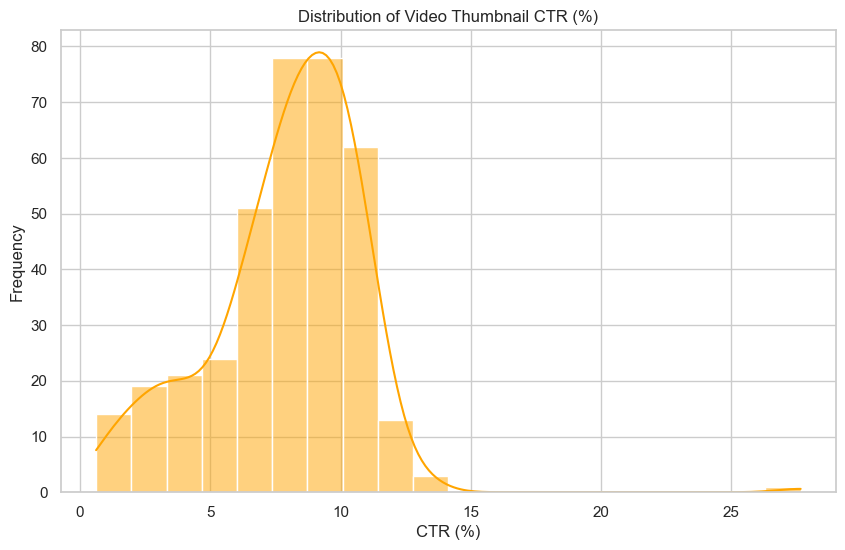

In [312]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Video Thumbnail CTR (%)'], bins=20, kde=True, color='orange')
plt.title('Distribution of Video Thumbnail CTR (%)')
plt.xlabel('CTR (%)')
plt.ylabel('Frequency')
plt.show()


# Heatmap: Correlation Between 'Watch Time (hours)', 'Subscribers', 'Estimated Revenue (USD)', 'Views', 'Impressions'

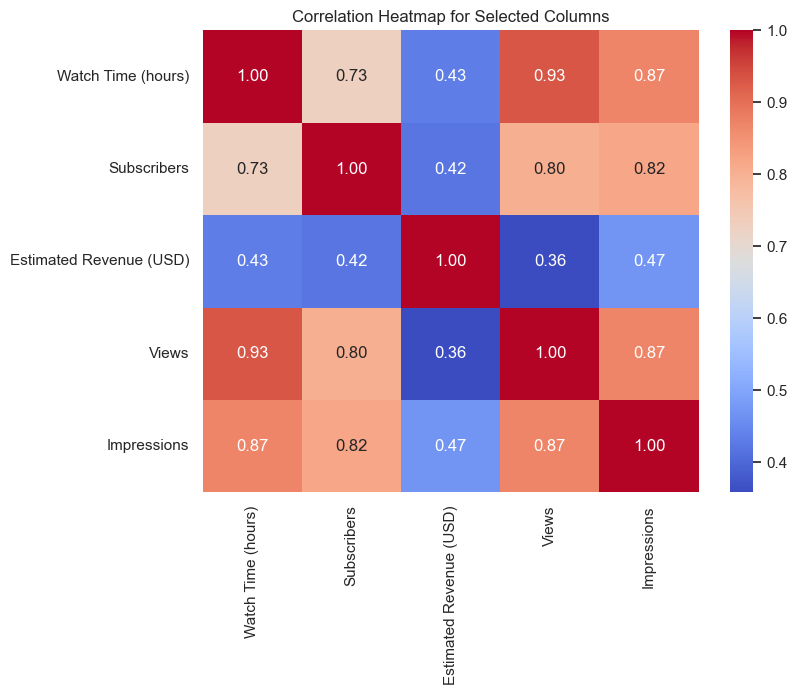

In [313]:
# Select the important columns
important_columns = df[['Watch Time (hours)', 'Subscribers', 'Estimated Revenue (USD)', 'Views', 'Impressions']]

# Calculate and plot correlation heatmap for the selected columns
plt.figure(figsize=(8, 6))
sns.heatmap(important_columns.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Selected Columns')
plt.show()


# REGRESSION

In [314]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant columns
features = ['Watch Time (hours)', 'Likes', 'Shares', 'Impressions']
target = 'New Subscribers'

# Prepare the data
X = df[features]  # Features
y = df[target]    # Target variable

# Handle missing values if any (you could drop or fill missing values)
X = X.fillna(0)  # Example: Filling missing values with 0
y = y.fillna(0)  # Same for target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 52011.23616192415
R-squared: 0.7172289848542659


# Scatter Plot (Actual vs Predicted)  
This plot will show the actual values vs. the predicted values of new subscribers, helping us assess how closely the model's predictions match the real data.

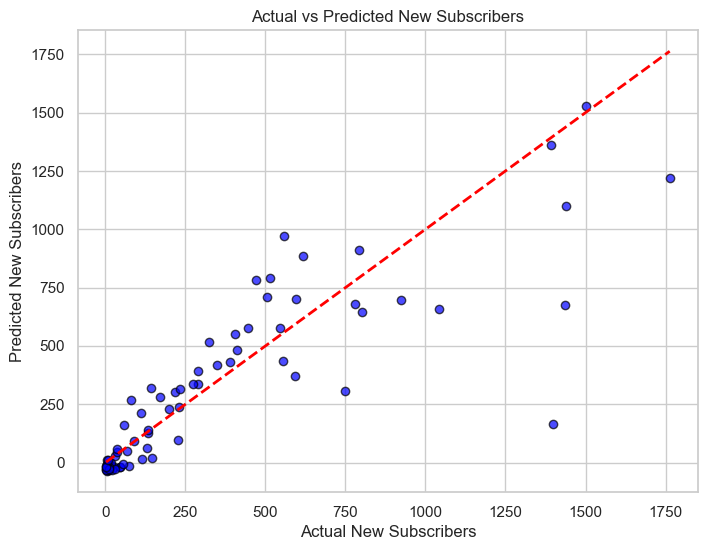

In [315]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, linestyle='--')  # Ideal line (y=x)
plt.title('Actual vs Predicted New Subscribers')
plt.xlabel('Actual New Subscribers')
plt.ylabel('Predicted New Subscribers')
plt.grid(True)
plt.show()


# Feature Importance (Coefficient Plot)  
This plot will show how important each feature is in predicting the target variable by looking at the regression model's coefficients.

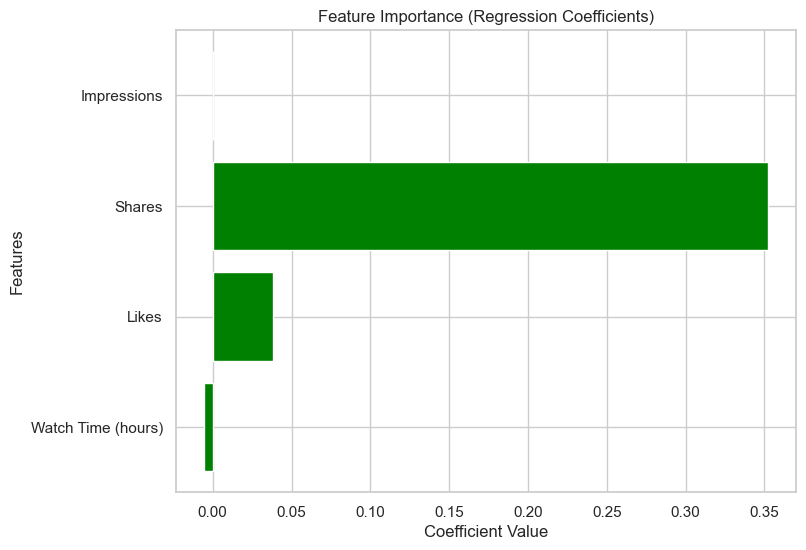

In [316]:
import numpy as np

# Get the coefficients for each feature
coefficients = model.coef_

# Create a bar plot to visualize the importance of each feature
plt.figure(figsize=(8, 6))
plt.barh(features, coefficients, color='green')
plt.title('Feature Importance (Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(True)
plt.show()


# Residual Plot  
The residual plot will help you analyze if the model's residuals (errors) are randomly distributed, which is important for validating a regression model.

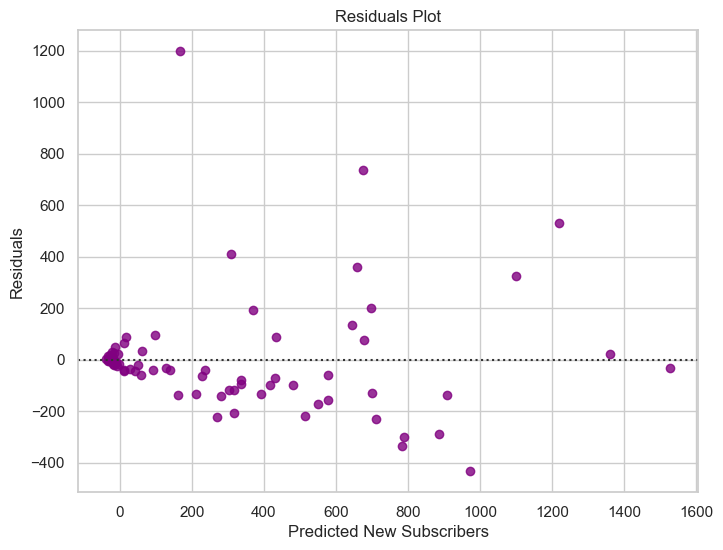

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals using seaborn's residplot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color='purple', line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals Plot')
plt.xlabel('Predicted New Subscribers')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()



Predicted values for test data: [302.33653418 -20.14600886 -17.150416    97.77362837 166.61792575]


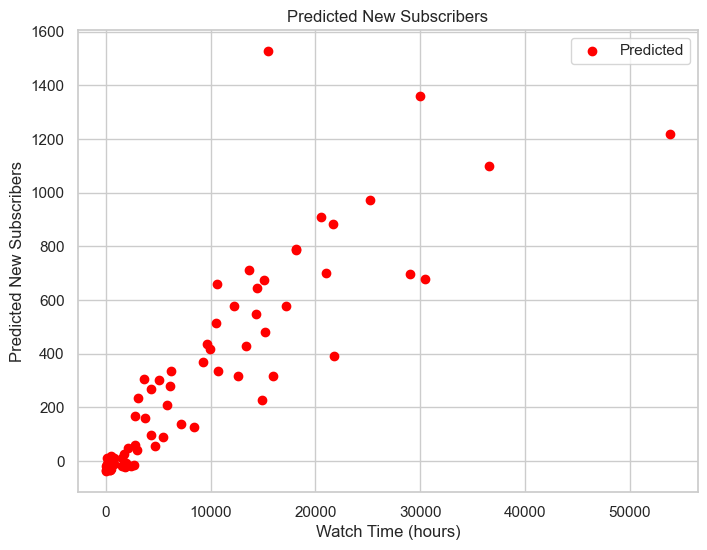

Mean Squared Error: 52011.23616192415
R-squared: 0.7172289848542659


In [318]:
# Predicting values for test data
y_pred_test = model.predict(X_test)

# Print some predicted values to inspect
print("Predicted values for test data:", y_pred_test[:5])

# Plot the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Watch Time (hours)'], y_pred_test, color='red', label='Predicted')
plt.title('Predicted New Subscribers')
plt.xlabel('Watch Time (hours)')
plt.ylabel('Predicted New Subscribers')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Actual vs Predicted Values


In [319]:
# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual New Subscribers': y_test,
    'Predicted New Subscribers': y_pred_test
})

# Print the comparison DataFrame
print(comparison_df)



     Actual New Subscribers  Predicted New Subscribers
193                  216.00                     302.34
33                    47.00                     -20.15
15                    47.00                     -17.15
347                  228.00                      97.77
57                  1399.00                     166.62
183                  447.00                     577.88
76                     3.00                     -28.89
119                  233.00                     317.19
152                  557.00                     971.77
126                  200.00                     228.45
227                  792.00                     909.34
39                    19.00                     -10.85
303                  171.00                     280.58
55                    75.00                     -13.66
137                  142.00                     317.77
298                  411.00                     481.61
0                     54.00                      -4.99
225       